In [1]:
from Precode2 import *
import numpy as np
import scipy.io
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import random
from random import randrange
import operator
%matplotlib inline

data = np.load('AllSamples.npy')
k1,i_point1,k2,i_point2 = initial_S2('5603') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [2]:
def plot_points(df,df_centroids):
    sns.set_style('darkgrid')
    sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster_id', palette='rainbow')
    sns.scatterplot(data = df_centroids, x = 'x', y = 'y', color = 'black' , s = 100)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    plt.close()

In [3]:
def distance(pt1, pt2):
    sum_value= 0

    for i in range(len(pt1)):
            sum_value += (pt1[i] - pt2[i])**2

    d = (sum_value)**0.5
    return d

In [114]:
def K_means(k,data,centroid_0):
    centroids = {}
    selected_centroid = []
    non_centroid = data.tolist()
    for i in range(k):
        if i == 0:
            ch = centroid_0
        else:
            dist = {}
            for j in non_centroid:
                sum_d = 0
                for l in selected_centroid:
                    sum_d += distance(j,l)
                dist[tuple(j)] = sum_d/len(selected_centroid)
            sorted_dist = sorted(dist.items(), key=operator.itemgetter(1))
            ch = sorted_dist[-1][0]
        selected_centroid.append(np.array(ch))
        non_centroid.remove(list(ch))
    k_count=0
    for c in selected_centroid:
        centroids[k_count] = c
        k_count += 1
    for i in range(len(data)):
        clusters = {}
        for i in range(k):
            clusters[i] = []
        for points in data:
            distances = [distance(points,centroids[centroid]) for centroid in centroids]
            min_dist = distances.index(min(distances))
            clusters[min_dist].append(points)
        prev = dict(centroids)
        for i in clusters:
            centroids[i] = np.average(clusters[i], axis = 0)
        converge = True
        for centroid in centroids:
            org = prev[centroid]
            curr = centroids[centroid]
            objective = np.sum((curr - org)/org * 100.0)
            if objective > 0.0001:
                converge = False
        if converge:
            break
    return centroids,clusters,objective

cost value: 2400.4750023157526
centroids: {0: array([4.41702748, 3.81542098]), 1: array([6.29697927, 7.98923507])}


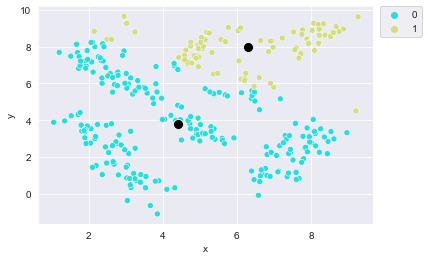

cost value: 1826.9895010997361
centroids: {0: array([4.46009089, 5.94862788]), 1: array([4.78439199, 1.75996986]), 2: array([8.13242336, 8.45183097])}


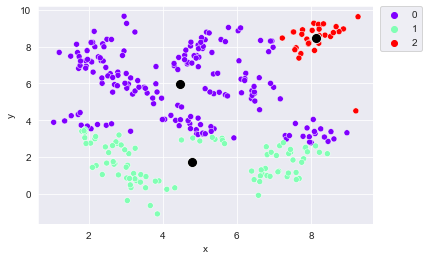

cost value: 1116.2626578188194
centroids: {0: array([5.51381131, 6.6871291 ]), 1: array([5.46810558, 2.23600141]), 2: array([2.45162074, 6.08990448]), 3: array([7.75648325, 8.55668928])}


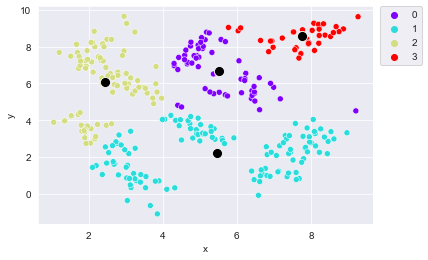

cost value: 987.5229953665723
centroids: {0: array([5.10678791, 6.05057222]), 1: array([7.1906231 , 1.67755968]), 2: array([8.16370091, 8.45133916]), 3: array([3.28992506, 2.4194226 ]), 4: array([2.15182306, 7.7353871 ])}


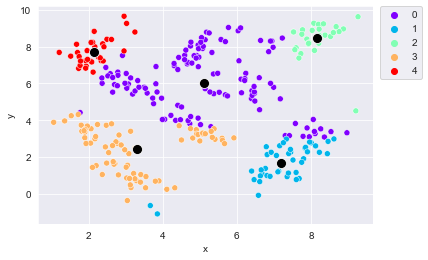

cost value: 476.118751676353
centroids: {0: array([7.41419243, 2.32169114]), 1: array([5.46427736, 6.83771354]), 2: array([3.14506148, 0.90770655]), 3: array([7.75648325, 8.55668928]), 4: array([3.49556658, 3.56611232]), 5: array([2.56333815, 6.9782248 ])}


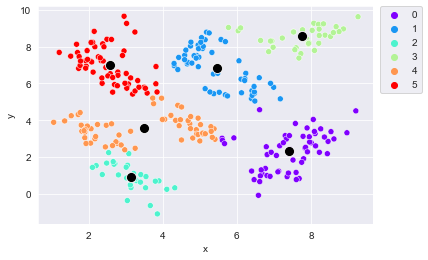

cost value: 399.68001855863355
centroids: {0: array([2.53650108, 6.85941978]), 1: array([7.39380325, 2.29452245]), 2: array([7.91430998, 8.51990981]), 3: array([3.16906145, 0.81432515]), 4: array([4.85939875, 7.94163821]), 5: array([5.94696208, 5.44598487]), 6: array([3.31074837, 3.47473078])}


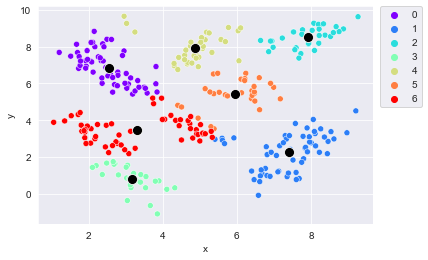

cost value: 349.7340457674296
centroids: {0: array([5.23053667, 4.2793425 ]), 1: array([5.15295442, 7.49728224]), 2: array([3.16906145, 0.81432515]), 3: array([8.39870753, 8.92549706]), 4: array([2.24204752, 3.25100749]), 5: array([2.54165252, 7.00267832]), 6: array([7.3212644 , 8.13123702]), 7: array([7.55616782, 2.23516796])}


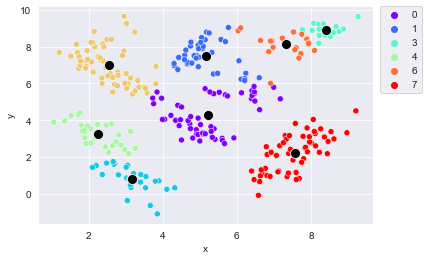

cost value: 232.34550801111064
centroids: {0: array([6.15468228, 5.70140721]), 1: array([3.16906145, 0.81432515]), 2: array([3.13834768, 5.93372322]), 3: array([7.91430998, 8.51990981]), 4: array([4.91251497, 3.56314096]), 5: array([2.24204752, 3.25100749]), 6: array([5.0217766 , 7.82401258]), 7: array([7.55616782, 2.23516796]), 8: array([2.18321462, 7.70355341])}


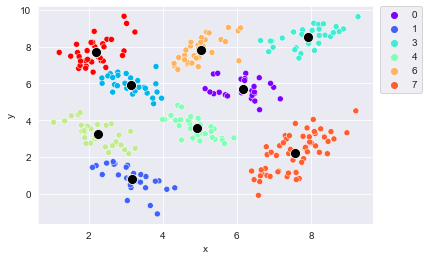

cost value: 220.1594892884666
centroids: {0: array([6.15468228, 5.70140721]), 1: array([3.16906145, 0.81432515]), 2: array([3.13834768, 5.93372322]), 3: array([4.91251497, 3.56314096]), 4: array([8.41127011, 8.97490383]), 5: array([2.24204752, 3.25100749]), 6: array([5.0217766 , 7.82401258]), 7: array([7.55616782, 2.23516796]), 8: array([2.18321462, 7.70355341]), 9: array([7.52197303, 8.160704  ])}


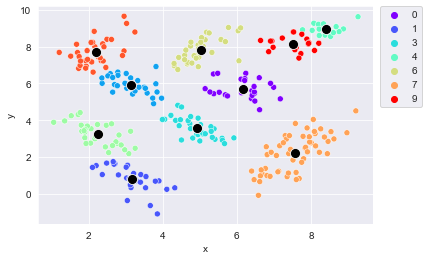

In [129]:
cost_function_by_k = {}
centroids_by_k = {}

for k in range(2,11):
    obj_fun = {}
    cost_value = 0

    
    if k == k1:
        centroid_0 = i_point1
    if k == k2:
        centroid_0 = i_point2
    else:
        centroid_0 = data[np.random.choice(data.shape[0],1,replace = False)][0]
    

    centroids,clusters,objective = K_means(k,data,centroid_0)
    for cluster in range(k):
        cost_value+=np.sum((clusters[cluster]-centroids[cluster])**2)
    obj_fun[k] = cost_value

    df_list = []
    for x in range(k):
        df_cluster = pd.DataFrame(clusters[x],columns =['x','y'])
        df_cluster['cluster_id'] = x
        df_list.append(df_cluster)
    df = pd.concat(df_list,axis = 0)
    df_centroids = pd.DataFrame(centroids).transpose()
    df_centroids.columns = ['x','y']

    cost_function_by_k[k] = cost_value
    centroids_by_k[k] = centroids

    print('cost value:', cost_value)
    print('centroids:',centroids)
    plot_points(df,df_centroids)


In [130]:
cost_function_by_k

{2: 2400.4750023157526,
 3: 1826.9895010997361,
 4: 1116.2626578188194,
 5: 987.5229953665723,
 6: 476.118751676353,
 7: 399.68001855863355,
 8: 349.7340457674296,
 9: 232.34550801111064,
 10: 220.1594892884666}

In [131]:
centroids_by_k

{2: {0: array([4.41702748, 3.81542098]), 1: array([6.29697927, 7.98923507])},
 3: {0: array([4.46009089, 5.94862788]),
  1: array([4.78439199, 1.75996986]),
  2: array([8.13242336, 8.45183097])},
 4: {0: array([5.51381131, 6.6871291 ]),
  1: array([5.46810558, 2.23600141]),
  2: array([2.45162074, 6.08990448]),
  3: array([7.75648325, 8.55668928])},
 5: {0: array([5.10678791, 6.05057222]),
  1: array([7.1906231 , 1.67755968]),
  2: array([8.16370091, 8.45133916]),
  3: array([3.28992506, 2.4194226 ]),
  4: array([2.15182306, 7.7353871 ])},
 6: {0: array([7.41419243, 2.32169114]),
  1: array([5.46427736, 6.83771354]),
  2: array([3.14506148, 0.90770655]),
  3: array([7.75648325, 8.55668928]),
  4: array([3.49556658, 3.56611232]),
  5: array([2.56333815, 6.9782248 ])},
 7: {0: array([2.53650108, 6.85941978]),
  1: array([7.39380325, 2.29452245]),
  2: array([7.91430998, 8.51990981]),
  3: array([3.16906145, 0.81432515]),
  4: array([4.85939875, 7.94163821]),
  5: array([5.94696208, 5.445

Text(0.5, 1.0, 'Strategy 2 k-Means Clustering')

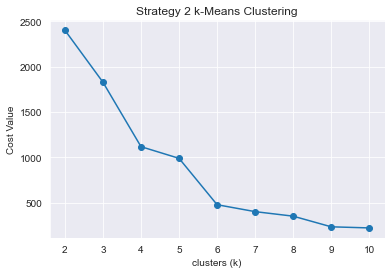

In [144]:
plt.plot(cost_function_by_k.keys(),cost_function_by_k.values(),marker='o')
plt.ylabel('Cost Value')
plt.xlabel('clusters (k)')
plt.title('Strategy 2 k-Means Clustering')